# Example Figure

In [1]:
from neurodsp.sim import sim_powerlaw

from neurodsp.aperiodic import compute_autocorr
from neurodsp.spectral import compute_spectrum

from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.plts.utils import save_figure

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
import seaborn as sns
sns.set_context('talk')

### Plot Settings

In [4]:
plt.style.use('local/old-style.mplstyle')

### FUNCTIONS

In [5]:
def plot_autocorr(timepoints, autocorrs):
    """Plot autocorrelation results."""
    
    _, ax = plt.subplots(figsize=(6, 5))
    ax.plot(timepoints, autocorrs, color='k')
    ax.set(xlabel='Lag (Samples)', ylabel='Autocorrelation')

    ax.xaxis.set_tick_params(direction='out', length=5)#, which='both')
    ax.yaxis.set_tick_params(direction='out', length=5)#, which='both')

    plt.grid()

In [6]:
def plot_spectra_3D(freqs, powers, log_freqs=False, log_powers=True):
    """Plot a series of power spectra in a 3D plot."""
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    # Set background pane colors to white
    pane_color = (1.0, 1.0, 1.0, 1.0)
    plt.gca().xaxis.set_pane_color(pane_color)
    plt.gca().yaxis.set_pane_color(pane_color)
    plt.gca().zaxis.set_pane_color(pane_color)
    
    # Set orientation
    #ax.view_init(20, -50)
    
    yticks = list(range(len(powers)))
    
    for cvals, yt in zip(powers, yticks):
        ax.plot(xs=freqs, ys=[yt] * len(freqs), zs=cvals)
    
    ax.set(
        
        # Labels
        xlabel='Frequency (Hz)',
        ylabel='Channels', 
        zlabel='Power',
        
        # Limits
        xlim=[min(freqs), max(freqs)],
        ylim=[0, max(yticks)],        
    )
    
    ax.set_yticks(yticks, yticks)

In [7]:
GS_FONT = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/GillSans.ttc')

def plot_old_stylify(ax):
    """Apply an 'oldschool' style to a plot axis. 
    
    This function adapted from here:
    https://scipython.com/blog/old-style-matplotlib-charts/
    """
    
    ax.set_xlabel(ax.get_xlabel(), fontproperties=GS_FONT, fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=GS_FONT, fontsize=18)

    for tick in ax.get_xticklabels():
        tick.set_fontname("Gill Sans")
        tick.set_fontsize(12)
    for tick in ax.get_yticklabels():
        tick.set_fontname("Gill Sans")
        tick.set_fontsize(12)

### Simulate Signal

In [8]:
# Signal settings
n_seconds = 10
fs = 250

In [9]:
# Example signal
sig = sim_powerlaw(n_seconds, fs, -1)

In [10]:
# Multiple Signals
sigs = []
powers = []
exps = [-2, -1.5, -1, -0.5, 0]
for exp in exps:
    csig = sim_powerlaw(n_seconds, fs, exp)

    freqs, cpowers = compute_spectrum(sig, fs)
    
    sigs.append(csig)
    powers.append(cpowers)

### Visualize Example Time Series

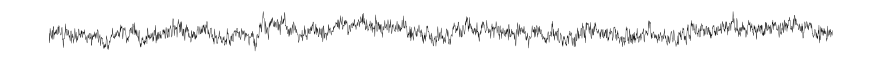

In [11]:
plot_time_series(None, sig, linewidth=0.25, figsize=(10, 1.5))
plt.gca().set_axis_off()
#plot_old_stylify(plt.gca())

### AutoCorrelation

In [12]:
# Compute signal autocorrelation
timepoints, autocorrs = compute_autocorr(sig)

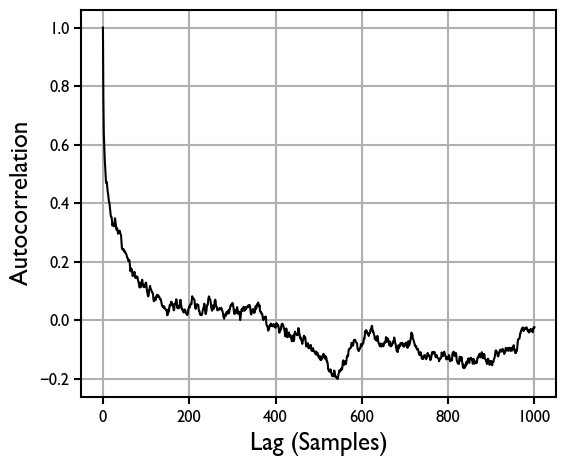

In [13]:
# Plot autocorrelations
plot_autocorr(timepoints, autocorrs)
plot_old_stylify(plt.gca())
plt.tight_layout()
save_figure('figs/ac.pdf')

### Spectrum

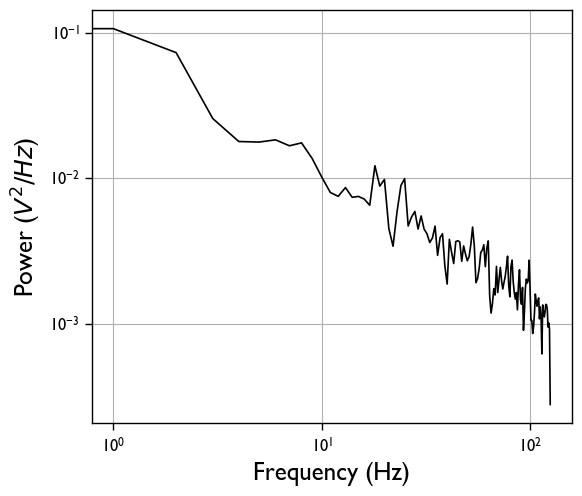

In [19]:
# Plot example power spectrum
plot_power_spectra(*compute_spectrum(sig, fs),
                   colors='k', figsize=(6, 5))
ax = plt.gca()
ax.xaxis.set_tick_params(direction='out', which='both', length=5)
ax.yaxis.set_tick_params(direction='out', which='both', length=5)
plt.minorticks_off()
plt.grid()
plot_old_stylify(ax)
save_figure('figs/psd.pdf')

### XX

In [16]:
sns.set_context('paper')

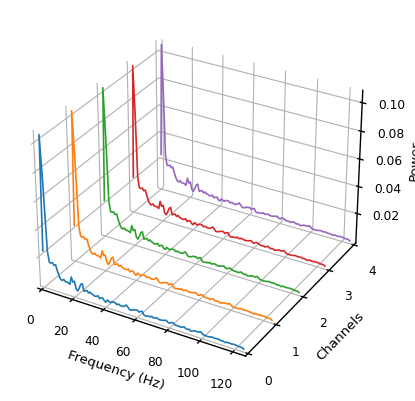

In [17]:
plot_spectra_3D(freqs, powers)
plot_old_stylify(ax)
save_figure('figs/3d.pdf')